In [ ]:
#IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
#LOAD DATA

df = pd.read_csv('airbnb_Dallas.csv')

In [ ]:
# Preprocessing
df['Property Type'] = df['Property Type'].replace({'Camper/rv':'Camper/RV'})
df['Property Type'] = df['Property Type'].replace({'Entire camper/RV':'Camper/RV'})
df['Property Type'] = df['Property Type'].replace({'Entire condominium':'Condominium'})
df['Property Type'] = df['Property Type'].replace({'Bed and breakfast':'Bed & Breakfast'})
df['Property Type'] = df['Property Type'].replace({'Entire bungalow':'Bungalow'})
df['Property Type'] = df['Property Type'].replace({'Entire place':'Entire house'})
df['Property Type'] = df['Property Type'].replace({'Entire guesthouse':'Guesthouse'})
df['Property Type'] = df['Property Type'].replace({'Entire house':'House'})
df['Property Type'] = df['Property Type'].replace({'Entire loft':'Loft'})
df['Property Type'] = df['Property Type'].replace({'Room in boutique hotel':'Boutique hotel'})
df['Property Type'] = df['Property Type'].replace({'Room in hostel':'Hostel'})
df['Property Type'] = df['Property Type'].replace({'Entire townhouse':'Townhouse'})
df['Property Type'] = df['Property Type'].replace({'Entire apartment':'Apartment'})

In [ ]:
#NULL HANDLING

#Print columns with NA values
columns_with_nan = []
for column in df.columns:
    if df[column].isnull().any():
        columns_with_nan.append(column)
print("Columns with NaN values:", columns_with_nan)

#Replace NaN values in numeric and non-numeric columns
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(0, inplace=True)
    else:
        df[column].fillna("NA", inplace=True)
print("DataFrame after imputing zeros for numeric columns and 'NA' for others:")
print(df)

#Check for NaN columns after imputation
columns_with_nan = []
for column in df.columns:
    if df[column].isnull().any():
        columns_with_nan.append(column)
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear', 'prop_5_StarReviews_pastYear', 'prev_rating_ave_pastYear', 'prev_numReviews_pastYear', 'prev_numCancel_pastYear', 'prev_num_5_star_Rev_pastYear', 'prev_prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'prev_numReservedDays_pastYear', 'prev_numReserv_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear', 'prev_hostResponseAverage_pastYear', 'available_days', 'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'prev_available_days', 'prev_available_days_aveListedPrice', 'prev_booked_days', 'prev_booked_days_avePrice', 'Bathrooms', 'Neighborhood', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Integrated Property Manager', 'prev_Nightly Rate', 'Number of Reviews', 'prev_Number of Reviews', 'Rating Overall', 'prev_Rating Overall', 'revenue',

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame with a 'revenue' column
# Replace this with your actual DataFrame
# df = ...

# Calculate descriptive statistics for the 'revenue' column
revenue_stats = df['revenue'].describe().to_frame(name='Revenue Statistics')

# Display the descriptive statistics as a table using tabulate
table = tabulate(revenue_stats, headers='keys', tablefmt='pretty')

# Print the table
print(table)


+-------+--------------------+
|       | Revenue Statistics |
+-------+--------------------+
| count |      48711.0       |
| mean  | 2049.271622426146  |
|  std  | 3745.623263107884  |
|  min  |        0.0         |
|  25%  |        0.0         |
|  50%  |       787.0        |
|  75%  |       2759.0       |
|  max  |      134209.0      |
+-------+--------------------+


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame with a 'revenue' column
# Replace this with your actual DataFrame
# df = ...

# Calculate descriptive statistics for the 'revenue' column
revenue_stats = df['Max Guests'].describe().to_frame(name='Max Guests Statistics')

# Display the descriptive statistics as a table using tabulate
table = tabulate(revenue_stats, headers='keys', tablefmt='pretty')

# Print the table
print(table)

+-------+-----------------------+
|       | Max Guests Statistics |
+-------+-----------------------+
| count |        48711.0        |
| mean  |  3.9419227689844183   |
|  std  |  2.5689933720159845   |
|  min  |          0.0          |
|  25%  |          2.0          |
|  50%  |          4.0          |
|  75%  |          5.0          |
|  max  |         16.0          |
+-------+-----------------------+


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame with a 'revenue' column
# Replace this with your actual DataFrame
# df = ...

# Calculate descriptive statistics for the 'revenue' column
revenue_stats = df['Neighborhood'].describe().to_frame(name='Neighborhood Statistics')

# Display the descriptive statistics as a table using tabulate
table = tabulate(revenue_stats, headers='keys', tablefmt='pretty')

# Print the table
print(table)

+--------+-------------------------+
|        | Neighborhood Statistics |
+--------+-------------------------+
| count  |          48711          |
| unique |           18            |
|  top   |     Central Dallas      |
|  freq  |          25470          |
+--------+-------------------------+


In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming df is your DataFrame with a 'revenue' column
# Replace this with your actual DataFrame
# df = ...

# Calculate descriptive statistics for the 'revenue' column
revenue_stats = df['Nightly Rate'].describe().to_frame(name='Nightly Rate Statistics')

# Display the descriptive statistics as a table using tabulate
table = tabulate(revenue_stats, headers='keys', tablefmt='pretty')

# Print the table
print(revenue_stats)

       Nightly Rate Statistics
count             48711.000000
mean                157.173051
std                 169.886401
min                   1.000000
25%                  69.000000
50%                 107.500000
75%                 185.125000
max                1900.000000


In [ ]:
#CONVERT DATE TO OBTAIN QUARTERS

#Convert the "Scraped_Date" column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

#Create a new column for quarters based on the month
df['Quarter'] = df['Scraped Date'].dt.month.apply(lambda x: 'Q1' if 1 <= x <= 3 else 'Q2' if 4 <= x <= 6 else 'Q3' if 7 <= x <= 9 else 'Q4')

#Print the updated DataFrame
print(df['Quarter'])

0        Q3
1        Q4
2        Q1
3        Q2
4        Q3
         ..
48706    Q1
48707    Q2
48708    Q1
48709    Q2
48710    Q2
Name: Quarter, Length: 48711, dtype: object


In [ ]:
#CONVERT DATE TO OBTAIN YEAR

#Convert the "Scraped_Date" column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

#Create a new column for the year
df['Year'] = df['Scraped Date'].dt.year

#Print the updated DataFrame
print(df['Year'])

0        2016
1        2016
2        2017
3        2017
4        2017
         ... 
48706    2020
48707    2020
48708    2020
48709    2020
48710    2020
Name: Year, Length: 48711, dtype: int64


In [ ]:
#ADJUST YEARS FOR TIME SERIES

def adjust_year(row):
    if row['Quarter'] == 'Q4':
        if row['Year'] == 2017:
            return 2017
        elif row['Year'] == 2016:
            return 2016
        elif row['Year'] == 2018:
            return 2018
        elif row['Year'] == 2019:
            return 2019
        elif row['Year'] == 2020:
            return 2020
    return 0  # Return 0 if conditions are not met

# Apply the function to create the new column 'Year_Adjusted'
df['Year_Adjusted'] = df.apply(adjust_year, axis=1)

# Filter to keep rows where 'Year_Adjusted' is not equal to 0
df = df[df['Year_Adjusted']!=0]

Year_Adjusted
2016    2118369.0
2017    4024237.0
2018    7093302.0
2019    7456803.0
Name: revenue, dtype: float64


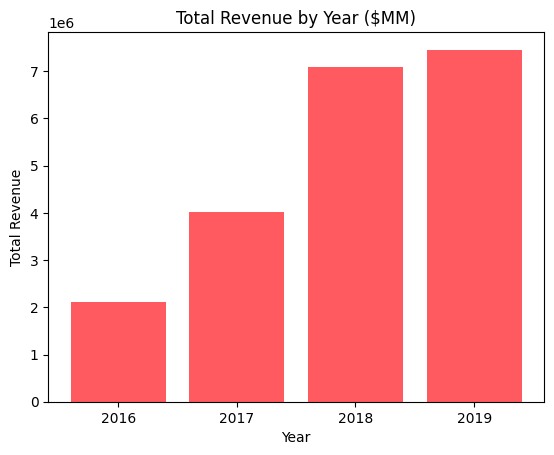

In [ ]:
#Before Outliers REV BY YEAR

# Calculate total revenue by Year_Adjusted
total_revenue_by_year = df.groupby('Year_Adjusted')['revenue'].sum()

# Display total revenue by year
print(total_revenue_by_year)

# Create a bar chart
plt.bar(total_revenue_by_year.index, total_revenue_by_year.values, color='#FF5A5F')

# Set specific years to display on the x-axis
specific_years = [2016, 2017, 2018, 2019]  # Update with the years you want to display
plt.xticks(specific_years)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Year ($MM)')

# Disable logarithmic scaling on the y-axis
plt.yscale('linear')

# Display the bar chart
plt.show()

In [ ]:
#Remove outliers for revenue
# Assuming df is your DataFrame
# Calculate Z-scores for the 'revenue' column
#z_scores = np.abs((df['revenue'] - df['revenue'].mean()) / df['revenue'].std())

# Set a threshold for Z-score (e.g., 3)
#threshold = 3

# Remove rows with Z-scores above the threshold
#df = df[z_scores < threshold]


In [ ]:
#Remove outliers for Nightly Rate
# Assuming df is your DataFrame
# Calculate Z-scores for the 'revenue' column
#z_scores = np.abs((df['Nightly Rate'] - df['Nightly Rate'].mean()) / df['Nightly Rate'].std())

# Set a threshold for Z-score (e.g., 3)
#threshold = 3

# Remove rows with Z-scores above the threshold
#df = df[z_scores < threshold]

In [ ]:
#SEGMENT "Rating Overall" and "prev_Rating Overall" by deciles

# Round 'Rating Overall' to the nearest 10s place and replace the values in the DataFrame
df['Rating Overall'] = df['Rating Overall'].apply(lambda x: round(x, -1))

# Round 'prev_Rating Overall' to the nearest 10s place and replace the values in the DataFrame
df['prev_Rating Overall'] = df['prev_Rating Overall'].apply(lambda x: round(x, -1))


In [ ]:
#Set Variables

# Load the CSV file without headers
dfvar = pd.read_csv('cat.cont.variables2.csv', header=None)

# Iterate through each row in dfvar and remove columns as specified
for index, row in dfvar.iterrows():
    variable_name = row[0]  # Assuming the variable name is in the first column
    action = row[1]  # Assuming the action (e.g., 'REMOVE') is in the second column

    if action == 'REMOVE':
        # Check if the variable exists in the DataFrame before removing
        if variable_name in df.columns:
            df.drop(variable_name, axis=1, inplace=True)
        else:
            print(f"Column '{variable_name}' not found in the DataFrame.")

# Assuming dfvar is loaded and structured as described: variable names in the first column, action in the second column

continuous_variables = []  # List to store continuous variable names
categorical_variables = []  # List to store categorical variable names

# Iterate through each row in dfvar and update variable types as specified
for index, row in dfvar.iterrows():
    variable_name = row[0]  # Assuming the variable name is in the first column
    action = row[1]  # Assuming the action (e.g., 'Cont' or 'Cat') is in the second column

    if action == 'Cont':
        # Check if the variable exists in the DataFrame before changing its type
        if variable_name in df.columns:
            df[variable_name] = df[variable_name].astype(float)  # Convert to float or numeric type for continuous
            continuous_variables.append(variable_name)  # Add to continuous_variables list
        else:
            print(f"Column '{variable_name}' not found in the DataFrame.")
    elif action == 'Cat':
        # Check if the variable exists in the DataFrame before changing its type
        if variable_name in df.columns:
            df[variable_name] = df[variable_name].astype(str)  # Convert to string type for categorical
            categorical_variables.append(variable_name)  # Add to categorical_variables list
        else:
            print(f"Column '{variable_name}' not found in the DataFrame.")

# After looping through all rows in dfvar, columns have been designated as continuous or categorical in 'df'
# Continuous variables are stored in continuous_variables list, and categorical variables are stored in categorical_variables list



In [ ]:
# Remove specified variables from the list
variables_to_remove = ['Quarter', 'Year']

for variable in variables_to_remove:
    if variable in categorical_variables:
        categorical_variables.remove(variable)

In [ ]:
# Exclude 'Quarter' and 'Year' columns
df = df.drop(columns=['Quarter', 'Year'])

#Drop NA neighborhoods
#df = df[df['Neighborhood'] != 'NA']

#Rename Hillside/University Neighborhood values
df['Neighborhood'] = df['Neighborhood'].replace(
    {'Hillside/University Meadows/Ridge Wood Park/North Stonewall Terrace': 'Hillside etc.'}
)

#Rename NA to other for neighborhood
df['Neighborhood'] = df['Neighborhood'].replace(
    {'NA': 'Other'}
)


In [ ]:
#Exclude revnues of 0
#df = df[df['revenue'] != 0]

#Exclude availible days less than 21
#df = df[df['available_days'] > 20]

#Exclude booked days equal to zero
#df = df[df['booked_days'] != 0]

#Exclude hotel listing types
#df = df[df['Listing Type'] != 'Hotel room']

In [ ]:
#Optimized guest term
# Assuming 'df' is your DataFrame
#df['Optimized Guests for BRs'] = np.where(df['Max Guests'] < 3 * df['Bedrooms'], 0, 1)
#categorical_variables.append('Optimized Guests for BRs')
#print(categorical_variables)

In [ ]:
#Drop Airbnb Property ID and Airbnb Host ID
#df = df.drop(columns=['Airbnb Property ID', 'Airbnb Host ID'
                       #])


#Create copies of original dataframe. After Quarter and year are removed
#df2=df.copy()
# Exclude 'Quarter' and 'Year' columns
#df2 = df2.drop(columns=['Instantbook Enabled','prev_Instantbook Enabled'
                       #])


#df3=df.copy()
# Exclude 'Quarter' and 'Year' columns
#df3 = df3.drop(columns=['Instantbook Enabled','prev_Instantbook Enabled'
                       #])

Overall Booking ratio
0.11283071735448814
Private room Booking ratio
0.09465217477470846
Shared room Booking ratio
0.08091310635969198
Entire home/apt Booking ratio
0.11983633271085842
Count of instances where Max Guests < 3 * Bedrooms: 6404


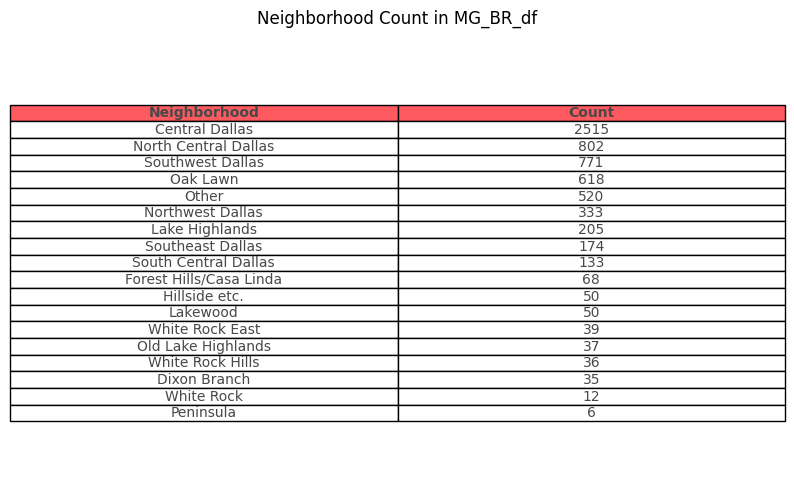

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Listing Type', 'booked_days', and 'Airbnb Property ID'

# Group by 'Listing Type' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df.agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

print('Overall Booking ratio')
print(ratio_df['Booking Ratio'])

df_private_room = df[df['Listing Type'] == 'Private room']
# Group by 'Listing Type' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_private_room.agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

print('Private room Booking ratio')
print(ratio_df['Booking Ratio'])




df_shared_room = df[df['Listing Type'] == 'Shared room']
# Group by 'Listing Type' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_shared_room.agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

print('Shared room Booking ratio')
print(ratio_df['Booking Ratio'])



df_house = df[df['Listing Type'] == 'Entire home/apt']
# Group by 'Listing Type' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_house.agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

print('Entire home/apt Booking ratio')
print(ratio_df['Booking Ratio'])

df_bedrooms = df[(df['Bedrooms'] != 0) & (df['Max Guests'] != 0)]
# Assuming 'df' is your DataFrame
MG_BR_df = df_bedrooms[df_bedrooms['Max Guests'] < 3 * df_bedrooms['Bedrooms']]

# Display count of instances meeting the condition
print("Count of instances where Max Guests < 3 * Bedrooms:",len(MG_BR_df)) #Short term listings can have up to 3 guests per bedroom



import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named MG_BR_df with a column 'Neighborhood'
# For demonstration purposes, let's assume the column name is 'Neighborhood'

# Group by 'Neighborhood' and calculate the count
neighborhood_count_df = MG_BR_df['Neighborhood'].value_counts().reset_index()
neighborhood_count_df.columns = ['Neighborhood', 'Count']

# Sort the DataFrame by 'Count' in descending order
sorted_count_df = neighborhood_count_df.sort_values(by='Count', ascending=False)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Display the sorted DataFrame as a table
table = plt.table(cellText=sorted_count_df.values,
                  colLabels=['Neighborhood', 'Count'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#FF5A5F', '#FF5A5F'])

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold', color='#484848')  # Header text is bold and white
    else:
        cell.set_text_props(color='#484848')

# Set the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide axis
plt.axis('off')

plt.title('Neighborhood Count in MG_BR_df')
plt.show()


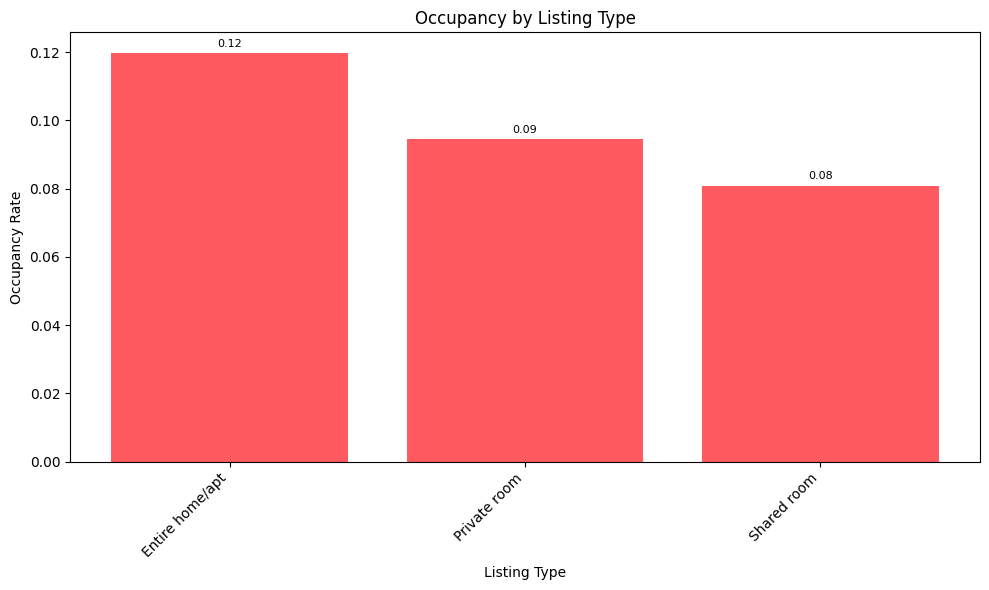

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Listing Type', 'booked_days', and 'Airbnb Property ID'
df_hotel = df[df['Listing Type'] != 'Hotel room']

# Group by 'Listing Type' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_hotel.groupby('Listing Type').agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

# Plot the bar chart with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(ratio_df['Booking Ratio'].sort_values(ascending=False).index,
               ratio_df['Booking Ratio'].sort_values(ascending=False),
               color='#FF5A5F')

# Add data labels using annotate
for bar, label in zip(bars, ratio_df['Booking Ratio'].sort_values(ascending=False)):
    plt.annotate(f'{label:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

plt.title('Occupancy by Listing Type')
plt.xlabel('Listing Type')
plt.ylabel('Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



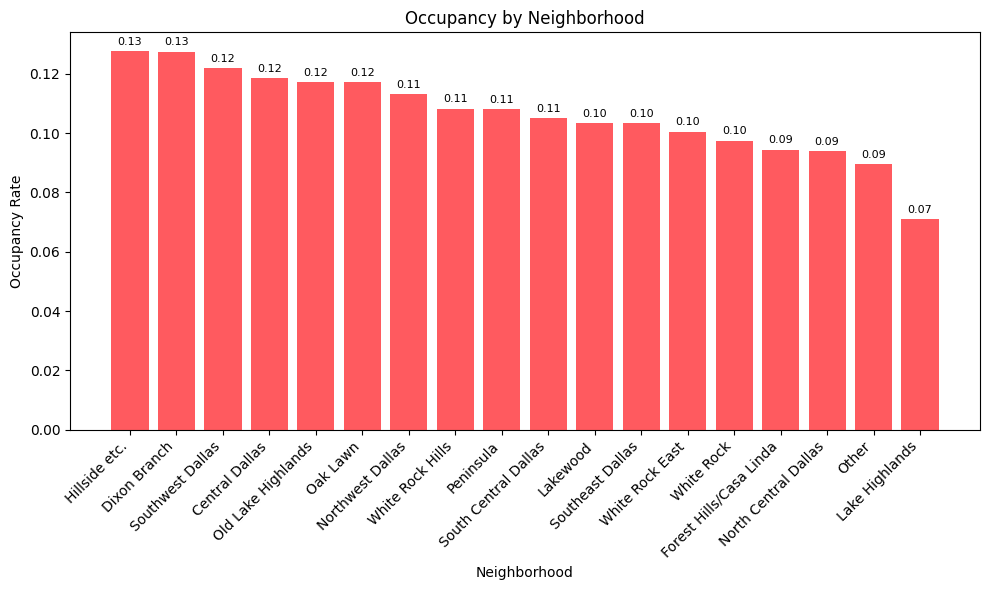

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Neighborhood', 'booked_days', and 'Airbnb Property ID'

# Group by 'Neighborhood' and calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_hotel.groupby('Neighborhood').agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Neighborhood Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']

# Plot the bar chart with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(ratio_df['Neighborhood Booking Ratio'].sort_values(ascending=False).index,
               ratio_df['Neighborhood Booking Ratio'].sort_values(ascending=False),
               color='#FF5A5F')

# Add data labels using annotate
for bar, label in zip(bars, ratio_df['Neighborhood Booking Ratio'].sort_values(ascending=False)):
    plt.annotate(f'{label:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)

plt.title('Occupancy by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Occupancy Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


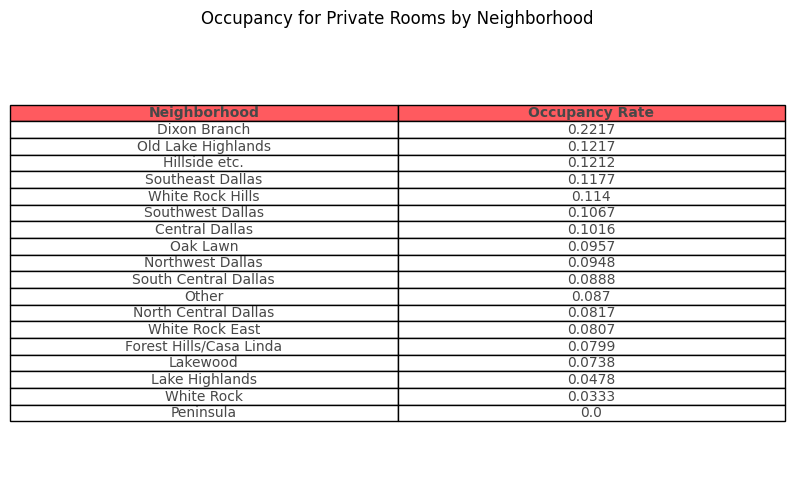

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Listing Type', 'booked_days', 'Airbnb Property ID', and 'Neighborhood'

# Filter the DataFrame for rows where 'Listing Type' is 'Private room'
df_private_room = df[df['Listing Type'] == 'Private room']

# Group by 'Neighborhood' and 'Listing Type', then calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_private_room.groupby(['Neighborhood', 'Listing Type']).agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']
ratio_df['Booking Ratio']=ratio_df['Booking Ratio'].round(4)

# Sort the DataFrame by 'Booking Ratio' in descending order
sorted_ratio_df = ratio_df.sort_values(by='Booking Ratio', ascending=False)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Display the sorted DataFrame as a table
table = plt.table(cellText=sorted_ratio_df.reset_index()[['Neighborhood', 'Booking Ratio']].values,
                  colLabels=['Neighborhood', 'Occupancy Rate'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#FF5A5F', '#FF5A5F'])

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold', color='#484848')  # Header text is bold and white
    else:
        cell.set_text_props(color='#484848')


# Set the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide axis
plt.axis('off')

plt.title('Occupancy for Private Rooms by Neighborhood')
plt.show()



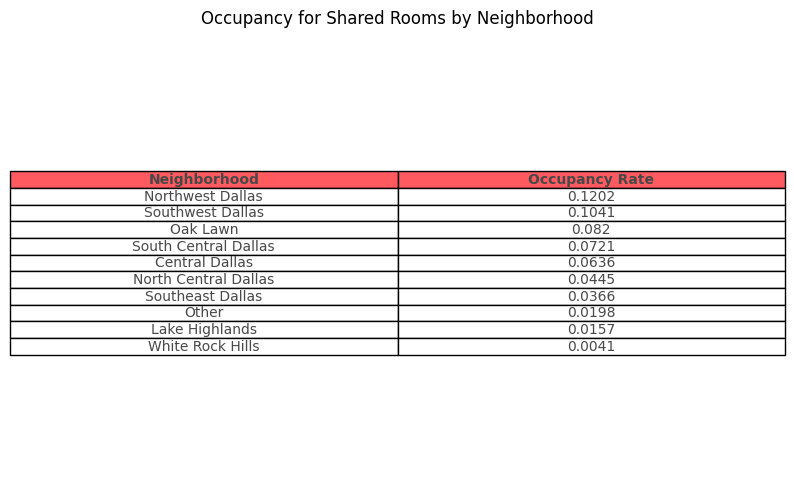

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Listing Type', 'booked_days', 'Airbnb Property ID', and 'Neighborhood'

# Filter the DataFrame for rows where 'Listing Type' is 'Shared room'
df_shared_room = df[df['Listing Type'] == 'Shared room']

# Group by 'Neighborhood' and 'Listing Type', then calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_shared_room.groupby(['Neighborhood', 'Listing Type']).agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']
ratio_df['Booking Ratio']=ratio_df['Booking Ratio'].round(4)

# Sort the DataFrame by 'Booking Ratio' in descending order
sorted_ratio_df = ratio_df.sort_values(by='Booking Ratio', ascending=False)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Display the sorted DataFrame as a table
table = plt.table(cellText=sorted_ratio_df.reset_index()[['Neighborhood', 'Booking Ratio']].values,
                  colLabels=['Neighborhood', 'Occupancy Rate'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#FF5A5F', '#FF5A5F'])

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold', color='#484848')  # Header text is bold and white
    else:
        cell.set_text_props(color='#484848')


# Set the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide axis
plt.axis('off')

plt.title('Occupancy for Shared Rooms by Neighborhood')
plt.show()


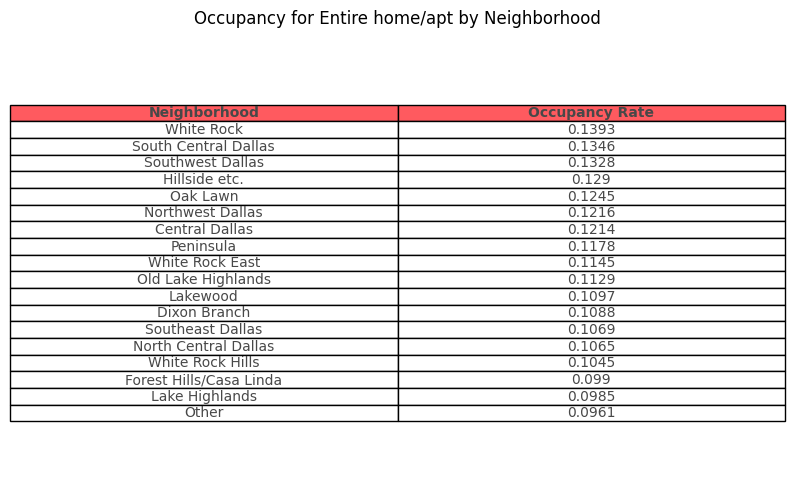

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with the required columns
# For demonstration purposes, let's assume the columns are 'Listing Type', 'booked_days', 'Airbnb Property ID', and 'Neighborhood'

# Filter the DataFrame for rows where 'Listing Type' is 'Shared room'
df_home = df[df['Listing Type'] == 'Entire home/apt']

# Group by 'Neighborhood' and 'Listing Type', then calculate the ratio of booked days to the count of Airbnb Property ID
ratio_df = df_home.groupby(['Neighborhood', 'Listing Type']).agg({'booked_days': 'sum', 'available_days': 'sum'})
ratio_df['Booking Ratio'] = ratio_df['booked_days'] / ratio_df['available_days']
ratio_df['Booking Ratio']=ratio_df['Booking Ratio'].round(4)

# Sort the DataFrame by 'Booking Ratio' in descending order
sorted_ratio_df = ratio_df.sort_values(by='Booking Ratio', ascending=False)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Display the sorted DataFrame as a table
table = plt.table(cellText=sorted_ratio_df.reset_index()[['Neighborhood', 'Booking Ratio']].values,
                  colLabels=['Neighborhood', 'Occupancy Rate'],
                  cellLoc='center',
                  loc='center',
                  colColours=['#FF5A5F', '#FF5A5F'])

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold', color='#484848')  # Header text is bold and white
    else:
        cell.set_text_props(color='#484848')


# Set the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)

# Hide axis
plt.axis('off')

plt.title('Occupancy for Entire home/apt by Neighborhood')
plt.show()


In [ ]:
#Remove outliers for revenue
# Assuming df is your DataFrame
# Calculate Z-scores for the 'revenue' column
z_scores = np.abs((df['revenue'] - df['revenue'].mean()) / df['revenue'].std())

# Set a threshold for Z-score (e.g., 3)
threshold = 3

# Remove rows with Z-scores above the threshold
df = df[z_scores < threshold]

In [ ]:
#Remove outliers for Nightly Rate
# Assuming df is your DataFrame
# Calculate Z-scores for the 'revenue' column
z_scores = np.abs((df['Nightly Rate'] - df['Nightly Rate'].mean()) / df['Nightly Rate'].std())

# Set a threshold for Z-score (e.g., 3)
threshold = 3

# Remove rows with Z-scores above the threshold
df = df[z_scores < threshold]

In [ ]:
#Exclude revnues of 0
#df = df[df['revenue'] != 0]

#Exclude availible days less than 21
df = df[df['available_days'] > 20]

#Exclude booked days equal to zero
#df = df[df['booked_days'] != 0]

#Exclude hotel listing types
df = df[df['Listing Type'] != 'Hotel room']

In [ ]:
#After Outliers REV BY YEAR

# Calculate total revenue by Year_Adjusted
total_revenue_by_year_no_outliers = df.groupby('Year_Adjusted')['revenue'].sum()

# Display total revenue by year
print(total_revenue_by_year_no_outliers)

Year_Adjusted
2016    1763821.0
2017    3355013.0
2018    5779937.0
2019    6124143.0
Name: revenue, dtype: float64


In [ ]:
#Drop Airbnb Property ID and Airbnb Host ID
df = df.drop(columns=['Airbnb Property ID', 'Airbnb Host ID'
                       ])


#Create copies of original dataframe. After Quarter and year are removed
df2=df.copy()
# Exclude 'Quarter' and 'Year' columns
df2 = df2.drop(columns=['Instantbook Enabled','prev_Instantbook Enabled'
                       ])


df3=df.copy()
# Exclude 'Quarter' and 'Year' columns
df3 = df3.drop(columns=['Instantbook Enabled','prev_Instantbook Enabled'
                       ])

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'df' is your DataFrame with one-hot encoded columns
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('revenue', axis=1)
y = df['revenue']

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Split the data into a 75% training set and a 25% validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit the linear regression model on the training set
model = sm.OLS(y_train, X_train).fit()

# Print the model summary on the training set
print("Training Set Model Summary:")
print(model.summary())

# Make predictions on the training set and validation set
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

# Calculate and print the R-squared for the training set and validation set
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f"\nTraining Set R-squared: {train_r2:.4f}")
print(f"Validation Set R-squared: {valid_r2:.4f}")

# Calculate and print the Mean Squared Error (MSE) for the training set and validation set
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)

print(f"\nTraining Set Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Validation Set Mean Squared Error (MSE): {valid_mse:.4f}")



Training Set Model Summary:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     244.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:30:55   Log-Likelihood:                -58019.
No. Observations:                7216   AIC:                         1.164e+05
Df Residuals:                    7053   BIC:                         1.175e+05
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
#All predictors included in model

# Assuming 'df' is your DataFrame with one-hot encoded columns
#df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)


# Separate features (X) and target variable (y)
#X = df.drop('revenue', axis=1)
#y = df['revenue']

# Add a constant term to the features matrix
#X = sm.add_constant(X)

# Fit the linear regression model
#model = sm.OLS(y, X).fit()

# Print the model summary
#print(model.summary())

In [ ]:
#Manually selected variables to remove
#Created interaction terms

# Exclude 'Quarter' and 'Year' columns
df2 = df2.drop(columns=['superhost_period_all', 'prev_superhost_period_all', 'numCancel_pastYear',
                        'prev_prop_5_StarReviews_pastYear', 'prev_numCancel_pastYear',
                        'prev_num_5_star_Rev_pastYear', 'prev_numReservedDays_pastYear',
                        'prev_numReserv_pastYear', 'hostResponseNumber_pastYear',
                        'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear',
                        'prev_hostResponseAverage_pastYear', 'Rating Overall', 'prev_Rating Overall', 'Zipcode'
                        ])

# Remove specified variables from the list
variables_to_remove = ['superhost_period_all', 'prev_superhost_period_all', 'numCancel_pastYear',
                       'prev_prop_5_StarReviews_pastYear', 'prev_numCancel_pastYear',
                       'prev_num_5_star_Rev_pastYear', 'prev_numReservedDays_pastYear',
                       'prev_numReserv_pastYear', 'hostResponseNumber_pastYear',
                       'hostResponseAverage_pastYear', 'prev_hostResponseNumber_pastYear',
                       'prev_hostResponseAverage_pastYear', 'Rating Overall', 'prev_Rating Overall', 'Zipcode','Instantbook Enabled','prev_Instantbook Enabled','occupancy_rate']

categorical_variables2 = categorical_variables
continuous_variables2 = continuous_variables

for variable in variables_to_remove:
    if variable in categorical_variables2:
        categorical_variables2.remove(variable)
    if variable in continuous_variables2:
        continuous_variables2.remove(variable)


# Assuming 'df' is your DataFrame with one-hot encoded columns
df2 = pd.get_dummies(df2, columns=categorical_variables2, drop_first=True)

neighborhood_columns = [col for col in df2.columns if col.startswith('Neighborhood_')]
# Create interaction terms for each one-hot encoded 'Neighborhood' column with 'Max Guests'
for col in neighborhood_columns:
    df2[f'{col}_Max_Guests'] = df2[col] * df2['Max Guests']

listing_type_columns = [col for col in df2.columns if col.startswith('Listing Type_')]

# Create interaction terms for each combination of 'Neighborhood' and 'Listing Type'
for neighborhood_col in neighborhood_columns:
    for listing_type_col in listing_type_columns:
        interaction_col_name = f'{neighborhood_col}_{listing_type_col}'
        df2[interaction_col_name] = df2[neighborhood_col] * df2[listing_type_col]

# List of one-hot encoded 'Neighborhood' columns
#neighborhood_columns = [col for col in df2.columns if col.startswith('Neighborhood_')]
# List of one-hot encoded 'Property Type' columns
#property_type_columns = [col for col in df2.columns if col.startswith('Property Type_')]
# Create interaction terms for each combination of 'Neighborhood' and 'Property Type'
#for neighborhood_col in neighborhood_columns:
    #for property_type_col in property_type_columns:
        #interaction_col_name = f'{neighborhood_col}_{property_type_col}'
        #df2[interaction_col_name] = df2[neighborhood_col] * df2[property_type_col]


# Create interaction terms for each one-hot encoded 'Neighborhood' column with 'Max Guests'
#for col in neighborhood_columns:
    #df2[f'{col}_Nightly Rate'] = df2[col] * df2['Nightly Rate']


# Add interaction terms
#df2['Neighborhood_Max_Guests'] = df2['Neighborhood'] * df2['Max Guests']
#df2['Neighborhood_Property_Type'] = df2['Neighborhood'] * df2['Property Type']
#df2['Nightly_Rate_Neighborhood'] = df2['Nightly Rate'] * df2['Neighborhood']
df2['Max_Guests_Occupancy_Rate'] = df2['Max Guests'] * df2['occupancy_rate']
#df2['Prop_5starreviews_prevyear_Minimum_Stay'] = df2['prop_5_StarReviews_pastYear'] * df2['Minimum Stay']

df2 = df2.drop(columns=['occupancy_rate'])

# Separate features (X) and target variable (y)
X = df2.drop('revenue', axis=1)
y = df2['revenue']

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Get the initial list of columns
initial_columns = X.columns.tolist()

while True:
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Find variables with coefficients equal to 0
    zero_coeff_vars = model.params[model.params == 0].index.tolist()

    # Break the loop if no variables with coefficient 0 are found
    if not zero_coeff_vars:
        break

    # Remove variables with coefficients equal to 0
    X = X.drop(columns=zero_coeff_vars)
    print(f"Removed variables with coefficients equal to 0: {zero_coeff_vars}")

# Print the final model summary
print(model.summary())


# Get the coefficients and sort them in descending order
coefficients = model.params.sort_values(ascending=False)

# Print the list of variables and coefficients
print("Variable\tCoefficient")
print("==============================")
for variable, coefficient in coefficients.items():
    print(f"{variable}\t{coefficient}")

# Assuming 'coefficients' is the pandas Series containing coefficients
coefficients_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values})

# Filter for neighborhood coefficients excluding specified strings
neighborhood_coefficients_df = coefficients_df[coefficients_df['Variable'].str.startswith('Neighborhood_') & ~coefficients_df['Variable'].str.contains('Nightly Rate|Listing Type|Max_Guests')]

# Sort the DataFrame by 'Coefficient' in descending order
neighborhood_coefficients_df = neighborhood_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the table
print(neighborhood_coefficients_df)



Removed variables with coefficients equal to 0: ['Neighborhood_Peninsula_Listing Type_Shared room', 'Neighborhood_White Rock_Listing Type_Shared room', 'Neighborhood_White Rock East_Listing Type_Shared room']
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     429.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:30:57   Log-Likelihood:                -77165.
No. Observations:                9622   AIC:                         1.546e+05
Df Residuals:                    9489   BIC:                         1.555e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ... (Previous code remains unchanged)

# Separate features (X) and target variable (y)
X = df2.drop('revenue', axis=1)
y = df2['revenue']

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Split the data into a 75% training set and a 25% validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)


while True:
    # Fit the linear regression model
    model = sm.OLS(y_train, X_train).fit()

    # Find variables with coefficients equal to 0
    zero_coeff_vars = model.params[model.params == 0].index.tolist()

    # Break the loop if no variables with coefficient 0 are found
    if not zero_coeff_vars:
        break

    # Remove variables with coefficients equal to 0
    X_train = X_train.drop(columns=zero_coeff_vars)
    X_valid = X_valid.drop(columns=zero_coeff_vars)
    print(f"Removed variables with coefficients equal to 0: {zero_coeff_vars}")


# Fit the linear regression model on the training set
#model = sm.OLS(y_train, X_train).fit()

# Print the final model summary on the training set
print("Training Set Model Summary:")
print(model.summary())

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)
y_train_pred = model.predict(X_train)

# Calculate and print the R-squared on the validation set
valid_r2 = r2_score(y_valid, y_valid_pred)
print(f"\nValidation Set R-squared: {valid_r2:.4f}")

# Calculate and print the Mean Squared Error (MSE) for the training set and validation set
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)

print(f"\nTraining Set Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Validation Set Mean Squared Error (MSE): {valid_mse:.4f}")


coefficients = model.params.sort_values(ascending=False)
# Assuming 'coefficients' is the pandas Series containing coefficients
coefficients_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values})

# Filter for neighborhood coefficients excluding specified strings
neighborhood_coefficients_df = coefficients_df[
    coefficients_df['Variable'].str.startswith('Neighborhood_') &
    ~coefficients_df['Variable'].str.contains('Nightly Rate|Listing Type|Max_Guests')
]

# Sort the DataFrame by 'Coefficient' in descending order
neighborhood_coefficients_df = neighborhood_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the table using tabulate with 'pretty' format
table = tabulate(neighborhood_coefficients_df, headers='keys', tablefmt='pretty')

# Print the table
print(table)



# Assuming 'coefficients' is the pandas Series containing coefficients
coefficients_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values})

# Filter for neighborhood coefficients ending with 'Private room'
private_room_coefficients_df = coefficients_df[
    coefficients_df['Variable'].str.startswith('Neighborhood_') &
    coefficients_df['Variable'].str.endswith('Private room')]

# Sort the DataFrame by 'Coefficient' in descending order
private_room_coefficients_df = private_room_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the table for 'Private room'
print("Private Room Coefficients:")
print(tabulate(private_room_coefficients_df, headers='keys', tablefmt='pretty'))

# Filter for neighborhood coefficients ending with 'Shared room'
shared_room_coefficients_df = coefficients_df[
    coefficients_df['Variable'].str.startswith('Neighborhood_') &
    coefficients_df['Variable'].str.endswith('Shared room')]

# Sort the DataFrame by 'Coefficient' in descending order
shared_room_coefficients_df = shared_room_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the table for 'Shared room'
print("\nShared Room Coefficients:")
print(tabulate(shared_room_coefficients_df, headers='keys', tablefmt='pretty'))


# Assuming 'coefficients' is the pandas Series containing coefficients
coefficients_df = pd.DataFrame({'Variable': coefficients.index, 'Coefficient': coefficients.values})

# Filter for neighborhood coefficients ending with 'Private room'
private_room_coefficients_df = coefficients_df[
    coefficients_df['Variable'].str.startswith('Max_Guests_Occupancy_Rate')]

# Sort the DataFrame by 'Coefficient' in descending order
private_room_coefficients_df = private_room_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Display the table for 'Private room'
print("Max_Guests_Occupancy_Rate Coefficients:")
print(tabulate(private_room_coefficients_df, headers='keys', tablefmt='pretty'))




Removed variables with coefficients equal to 0: ['Neighborhood_Peninsula_Listing Type_Shared room', 'Neighborhood_White Rock_Listing Type_Shared room', 'Neighborhood_White Rock East_Listing Type_Shared room']
Training Set Model Summary:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     321.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:30:59   Log-Likelihood:                -57847.
No. Observations:                7216   AIC:                         1.160e+05
Df Residuals:                    7084   BIC:                         1.169e+05
Df Model:                         131                                         
Covariance Type:            nonrobust               

In [ ]:
#Previous 5 star reviews regression
#What drives previous 5 star reviews?

# Remove specified variables from the list
variables_to_remove = ['superhost_period_all','prev_superhost_period_all','numCancel_pastYear',
                       'prev_prop_5_StarReviews_pastYear','prev_numCancel_pastYear',
                       'prev_num_5_star_Rev_pastYear','prev_numReservedDays_pastYear',
                       'prev_numReserv_pastYear','hostResponseNumber_pastYear',
                       'hostResponseAverage_pastYear','prev_hostResponseNumber_pastYear',
                       'prev_hostResponseAverage_pastYear',
                       'Instantbook Enabled','prev_Instantbook Enabled','Rating Overall','prev_Rating Overall','Zipcode'
                       ]

categorical_variables3 = categorical_variables
continuous_variables3 = continuous_variables

for variable in variables_to_remove:
    if variable in categorical_variables3:
        categorical_variables2.remove(variable)
    if variable in continuous_variables3:
        continuous_variables2.remove(variable)

# Exclude 'Quarter' and 'Year' columns
df3 = df3.drop(columns=['superhost_period_all','prev_superhost_period_all','numCancel_pastYear',
                       'prev_prop_5_StarReviews_pastYear','prev_numCancel_pastYear',
                       'prev_num_5_star_Rev_pastYear','prev_numReservedDays_pastYear',
                       'prev_numReserv_pastYear','hostResponseNumber_pastYear',
                       'hostResponseAverage_pastYear','prev_hostResponseNumber_pastYear',
                       'prev_hostResponseAverage_pastYear','Rating Overall', 'prev_Rating Overall','Zipcode'
                       ])
#'Pets Allowed','Instantbook Enabled','prev_Instantbook Enabled'

# Assuming 'df' is your DataFrame with one-hot encoded columns
df3 = pd.get_dummies(df3, columns=categorical_variables3, drop_first=True)


# Separate features (X) and target variable (y)
X = df3.drop('prop_5_StarReviews_pastYear', axis=1)
y = df3['prop_5_StarReviews_pastYear']

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     prop_5_StarReviews_pastYear   R-squared:                       0.946
Model:                                     OLS   Adj. R-squared:                  0.946
Method:                          Least Squares   F-statistic:                     1886.
Date:                         Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                                 22:31:00   Log-Likelihood:                 10345.
No. Observations:                         9622   AIC:                        -2.051e+04
Df Residuals:                             9532   BIC:                        -1.986e+04
Df Model:                                   89                                         
Covariance Type:                     nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------

In [ ]:
#REMOVING PVALUES ABOVE .1

# Remove specified variables from the list
#variables_to_remove = ['superhost_period_all','prev_superhost_period_all','numCancel_pastYear',
                       #'prev_prop_5_StarReviews_pastYear','prev_numCancel_pastYear',
                       #'prev_num_5_star_Rev_pastYear','prev_numReservedDays_pastYear',
                       #'prev_numReserv_pastYear','hostResponseNumber_pastYear',
                       #'hostResponseAverage_pastYear','prev_hostResponseNumber_pastYear',
                       #'prev_hostResponseAverage_pastYear',
                       #'Instantbook Enabled','prev_Instantbook Enabled','Rating Overall','prev_Rating Overall','Zipcode'
                       #]

#categorical_variables2 = categorical_variables
#continuous_variables2 = continuous_variables

#for variable in variables_to_remove:
    #if variable in categorical_variables2:
        #categorical_variables2.remove(variable)
    #if variable in continuous_variables2:
        #continuous_variables2.remove(variable)

# Exclude 'Quarter' and 'Year' columns
#df2 = df2.drop(columns=['superhost_period_all','prev_superhost_period_all','numCancel_pastYear',
                       #'prev_prop_5_StarReviews_pastYear','prev_numCancel_pastYear',
                       #'prev_num_5_star_Rev_pastYear','prev_numReservedDays_pastYear',
                       #'prev_numReserv_pastYear','hostResponseNumber_pastYear',
                       #'hostResponseAverage_pastYear','prev_hostResponseNumber_pastYear',
                       #'prev_hostResponseAverage_pastYear','Rating Overall', 'prev_Rating Overall','Zipcode'
                       #])
#'Pets Allowed','Instantbook Enabled','prev_Instantbook Enabled'

# Assuming 'df' is your DataFrame with one-hot encoded columns
#df2 = pd.get_dummies(df2, columns=categorical_variables2, drop_first=True)


# Separate features (X) and target variable (y)
#X = df2.drop('revenue', axis=1)
#y = df2['revenue']

# Add a constant term to the features matrix
#X = sm.add_constant(X)

# Fit the linear regression model
#model = sm.OLS(y, X).fit()

# Print the model summary
#print(model.summary())

In [ ]:
#Backwards selection model based on interaction term model

# Separate features (X) and target variable (y)
X = df2.drop('revenue', axis=1)
y = df2['revenue']

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Initialize variables for backward selection
current_vars = list(X.columns)
max_r_squared = 0
final_vars = None

while len(current_vars) > 5:
    # Fit the linear regression model
    model = sm.OLS(y, X[current_vars]).fit()

    # Find the variable with the highest p-value
    worst_var = model.pvalues.idxmax()

    # Remove the variable with the highest p-value
    current_vars.remove(worst_var)
    print(model.rsquared)
    # Check if the current R-squared is greater than the maximum
    if model.rsquared > max_r_squared:
        max_r_squared = model.rsquared
        final_vars = current_vars.copy()

# Fit the final model using the selected variables
final_model = sm.OLS(y, X[final_vars]).fit()

# Print the final model summary
print(final_model.summary())


0.8564868606438889
0.856486859234172
0.8564868562422651
0.8564868506383587
0.8564868305774029
0.8564867557425736
0.8564866755262568
0.8564865767749821
0.8564864344167973
0.8564861952071758
0.8564859460556291
0.8564857269518994
0.8564854270360961
0.8564848564296358
0.8564848564296358
0.8564838858460213
0.8564830693175128
0.8564820326179676
0.8564820326179676
0.8564809986408846
0.8564798302753768
0.8564798302753767
0.8564798302753768
0.8564798302753767
0.8564775463836378
0.8564775463836378
0.8564752818344367
0.8564727247368928
0.8564698573607639
0.8564667629954797
0.8564638004589209
0.8564604861286369
0.8564594551147778
0.856457987890852
0.8564546060056096
0.8564506202598454
0.8564464415592776
0.8564448964316835
0.8564448964316834
0.8564406448746533
0.856436335328454
0.8564322773572852
0.8564278721077326
0.8564278721077326
0.8564275306614211
0.8564225169949691
0.8564174147793662
0.8564120876762317
0.8564120876762317
0.8564120876762317
0.8564120876762318
0.8564107791232567
0.8564050121260